# Logistic Regression

### Import Libraries

In [329]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Preprocessing Dataset

In [330]:
#Loading the dataset inside csv file into data_set
data_set = pd.read_csv('./dataset/lung-cancer-dataset.csv')

In [331]:
#check the wether the data is loaded
data_set.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [332]:
#check the datatype of the dataset atrributes
data_set.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [333]:
#gets a concise  summary of the dataset
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [334]:
#check if any missing values in the dataset 
data_set.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [335]:
#convert non numerical labels in to numerical labels
labeled_gender = LabelEncoder()
labeled_lung_cancer = LabelEncoder()
data_set['GENDER_N'] = labeled_gender.fit_transform(data_set['GENDER'])
data_set['LUNG_CANCER_N'] = labeled_gender.fit_transform(data_set['LUNG_CANCER'])

In [336]:
#check new dataset with numerical values for Gender and Lung cancer
data_set.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_N,LUNG_CANCER_N
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0


In [337]:
#check for the non numerical fields and remove them.
updated_data_set = data_set.drop(['GENDER','LUNG_CANCER'], axis = 'columns')
#check the dataset
updated_data_set.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_N,LUNG_CANCER_N
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,0


<AxesSubplot:xlabel='WHEEZING', ylabel='count'>

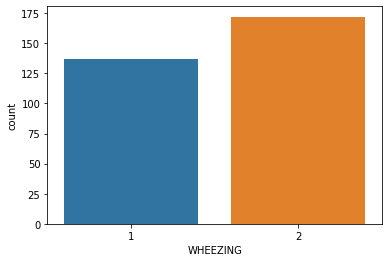

In [338]:
#wheezing plot
sbn.countplot(x='WHEEZING',data = data_set)

<AxesSubplot:xlabel='CHEST PAIN', ylabel='LUNG_CANCER_N'>

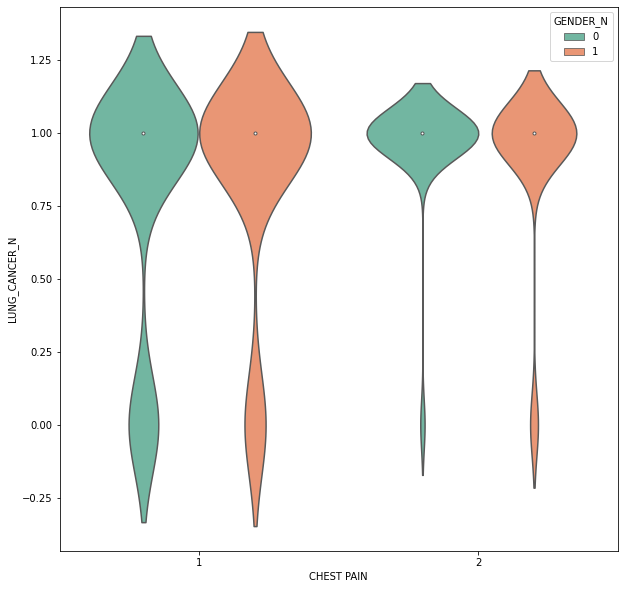

In [339]:
#chest pain and cough is main two sympttoms of cancer plot their data
plt.figure(figsize=(10,10))
sbn.violinplot(x='CHEST PAIN', y='LUNG_CANCER_N',hue='GENDER_N',palette="Set2", data=updated_data_set)

<AxesSubplot:xlabel='LUNG_CANCER_N', ylabel='AGE'>

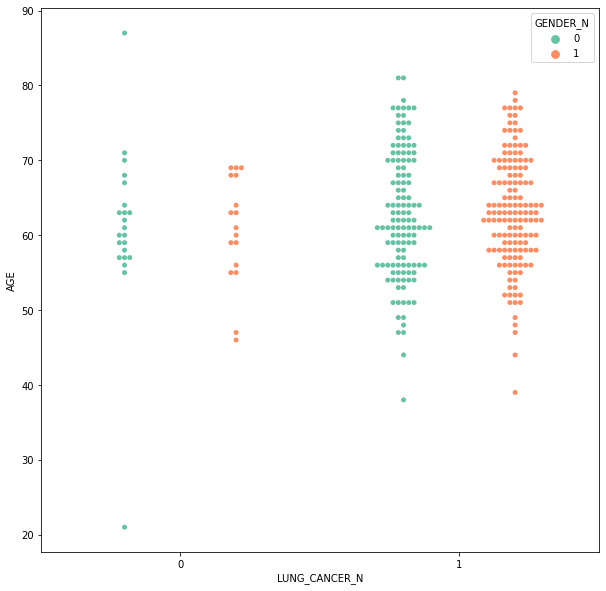

In [340]:
#categorize lung cancer predition acording to the age
plt.figure(figsize=(10,10))
sbn.swarmplot(x='LUNG_CANCER_N', y='AGE',hue='GENDER_N',palette='Set2',dodge=True, data=updated_data_set)

In [341]:
# Getting lung cancer posibilites divided on 'yes = 1' or 'no = 0'
lc0_data_set = updated_data_set[updated_data_set.LUNG_CANCER_N == 0]
lc1_data_set = updated_data_set[updated_data_set.LUNG_CANCER_N == 1]

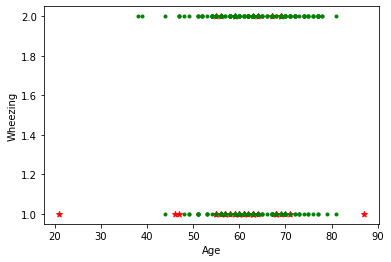

In [342]:
# Plotting age against the wheezing parameter based on lung cancer posibility
# From above divided datasets
plt.xlabel('Age')
plt.ylabel('Wheezing')
plt.scatter(lc0_data_set['AGE'],lc0_data_set['WHEEZING'], color='red', marker='*')
plt.scatter(lc1_data_set['AGE'],lc1_data_set['WHEEZING'], color='green', marker='.')

### Dividing Data set into inputs and outputs

In [343]:
# Dropping the LUNG_CANCER_N column and getting input data set
input_data_set = updated_data_set.drop('LUNG_CANCER_N', axis = 'columns')

# Getting target data set with LUNG_CANCER_N column
target_data_set = updated_data_set['LUNG_CANCER_N']

#checking input dataset
input_data_set.head()


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_N
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [344]:
#checking output dataset
target_data_set.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER_N, dtype: int32

In [345]:
#data set divide and get training ang testing data
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(input_data_set, target_data_set, test_size = 0.25, random_state= 40)

In [346]:
#data fitting and accuracy checking using the model
LRmodel = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
LRmodel.fit(X_train_data,y_train_data)
LRmodel.score(X_test_data,y_test_data)

0.8846153846153846

In [347]:
def get_inputs():
    inputs = []
    print('Please enter your Information:')
    
    age = input("Enter your AGE ?\n") 
    inputs.append(age)
    smoking = input("Do you SMOKING ? Yes=2, No=1 \n") 
    inputs.append(smoking)
    yellow_fingers = input("Do you have YELLOW FINGERS ? Yes=2, No=1 \n")
    inputs.append(yellow_fingers)
    anxiety = input("Do you have ANXIETY ? Yes=2, No=1 \n") 
    inputs.append(anxiety)
    peer_pressure = input("Do you have PEER PRESSURE ? Yes=2, No=1 \n") 
    inputs.append(peer_pressure)
    chronic_disease = input("Do you have CHRONIC DISEASE ? Yes=2, No=1 \n") 
    inputs.append(chronic_disease)
    fatigue = input("Do you have FATIGUE ? Yes=2, No=1 \n")
    inputs.append(fatigue)
    allergy = input("Do you have ALLERGY ? Yes=2, No=1 \n") 
    inputs.append(allergy)
    wheezing = input("Do you have WHEEZING ? Yes=2, No=1 \n") 
    inputs.append(wheezing)
    alcohol = input("Do you drink too much alcohol ? Yes=2, No=1 \n") 
    inputs.append(alcohol)
    coughing = input("Do you have COUGHING ? Yes=2, No=1 \n") 
    inputs.append(coughing)
    breath = input("Do you have SHORTNESS OF BREATH ? Yes=2, No=1 \n") 
    inputs.append(breath)
    swallowing  = input("Do you have DIFFICULTY SWALLOWING ? Yes=2, No=1 \n") 
    inputs.append(swallowing)
    chest  = input("Do you have CHEST PAIN ? Yes=2, No=1 \n") 
    inputs.append(chest)
    gender = input("Enter your GENDER ? F=0, M=1 \n")
    inputs.append(gender)
    inputs= np.array(inputs, dtype=float)
    result = LRmodel.predict([inputs])
    
    print("\nResult")
    if(result[0] == 1):
        print("You have lung cancer")
    else:
        print("You don't have lung cancer")
    

get_inputs()


Please enter your Information:

Result
You don't have lung cancer


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
